In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [3]:
def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mu)**2 / (2*sigma**2))

In [4]:
x = np.linspace(-3, 3)
tau = 0.5

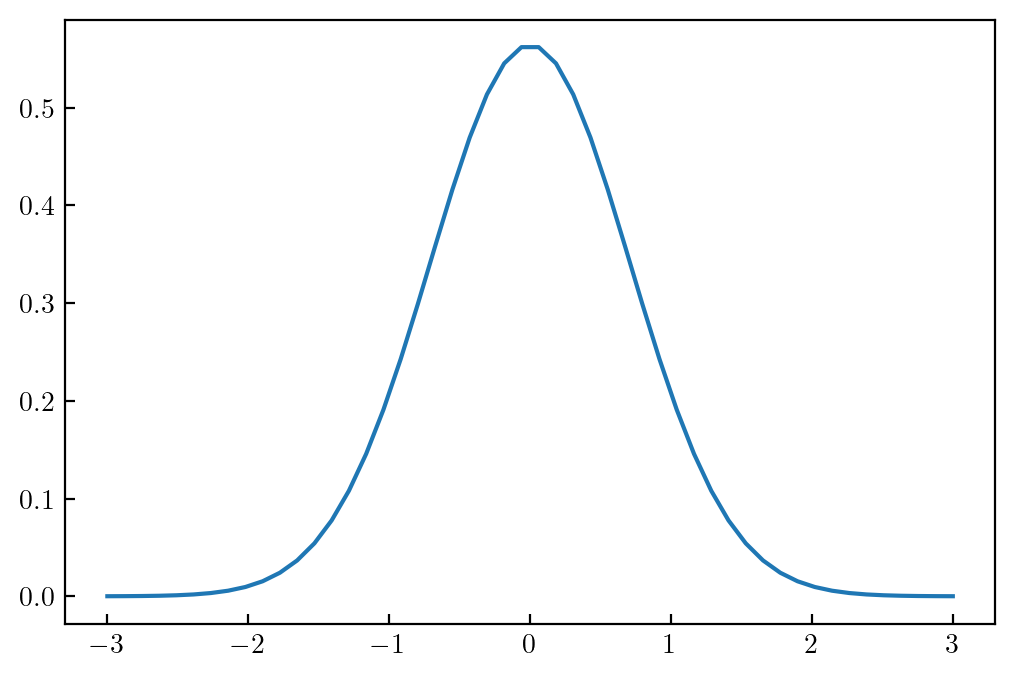

In [5]:
plt.plot(x, gaussian(x,0 , np.sqrt(tau)))

In [6]:
x = np.linspace(-0.2, 0.2, 10000 )

tau = 0.0001
np.trapz(gaussian(x,0 , np.sqrt(tau)),x)

1.0

In [7]:
gaussian(x,0 , np.sqrt(tau))

array([5.52094836e-86, 5.98077196e-86, 6.47878923e-86, ...,
       6.47878923e-86, 5.98077196e-86, 5.52094836e-86])

In [8]:
 rdm = np.random.normal(0,np.sqrt(tau), 1000)

In [9]:
def hist(x, bins=15):
    Y, X = np.histogram(x, bins, density=True)
    X = (X[1:] + X[:-1])/2
    return X,Y


In [10]:
X,Y = hist(rdm)

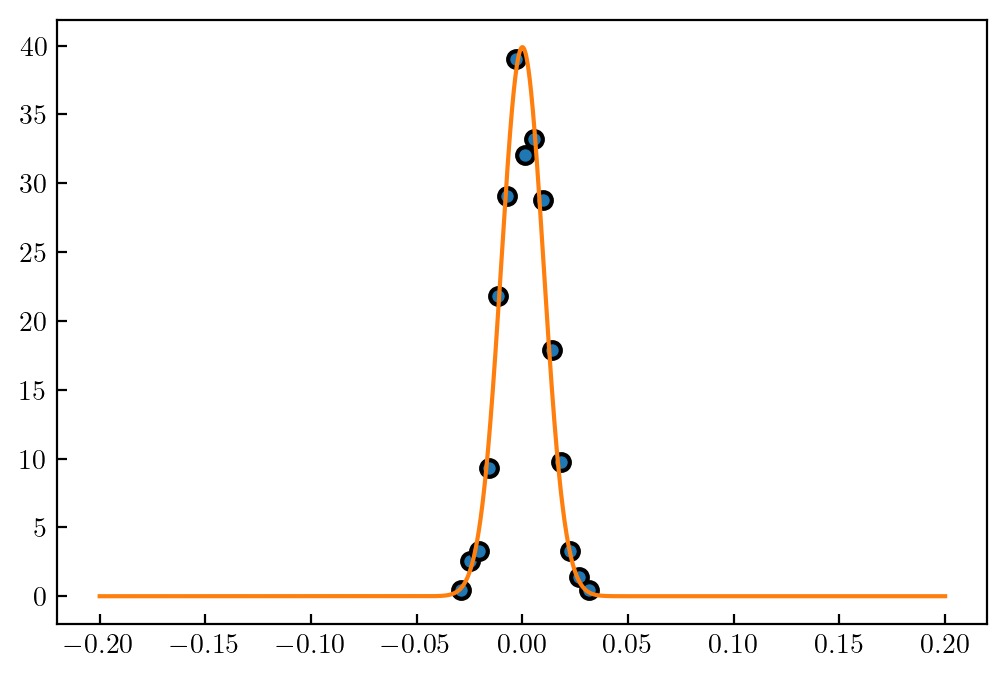

In [11]:
plt.plot(X,Y, "o")
plt.plot(x, gaussian(x,0 , np.sqrt(tau)))

In [36]:
Ns = [*np.arange(10,100,10),*np.arange(100,1000,100), *np.arange(1000,10000,1000),*np.arange(10000,100000,10000), *np.arange(100000,1000000,100000),]

In [71]:
from tqdm import trange

def diff(wi):
    return max(wi) - min(wi)

def iqr(wi):
    return np.subtract(*np.percentile(x, [75, 25]))

def optimal_bins(wi):
    n = int(diff(wi) / (2 * iqr(wi) * np.power(len(wi), -1/3)))
    
    if n <= 0:
        return 2
    else:
        return n
    
def eq(x, a):
    return a*np.power(x,-0.74)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:19<00:00, 10.22it/s]


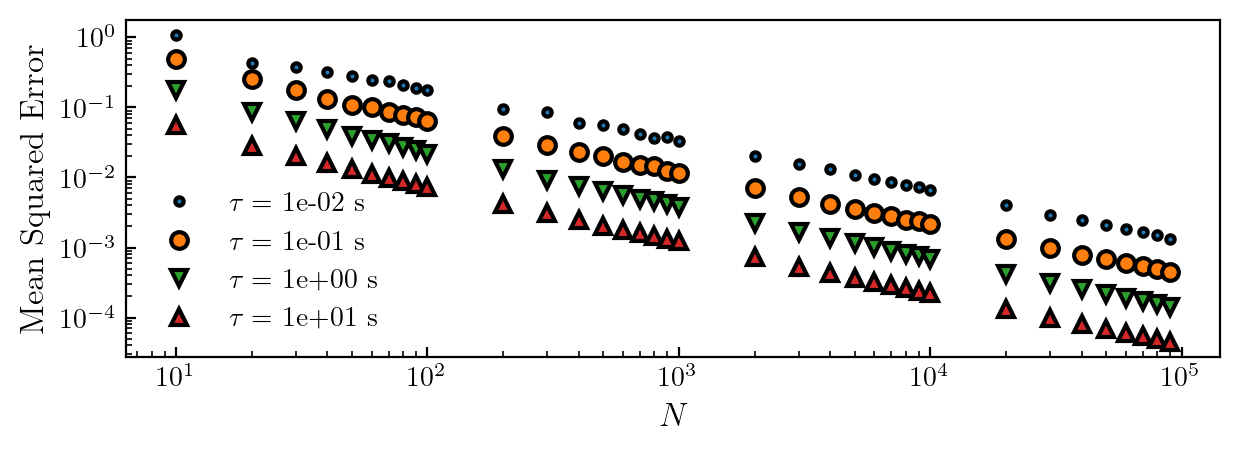

In [85]:
plt.figure(figsize=( cm2inch(16),cm2inch(6)))
taus = [0.01, 0.1, 1, 10]
sym = [".", "o", "v", "^", "s", "p"]
bs = []
ns = []
for j, tau in enumerate(taus):
    errs = np.zeros(len(Ns))
    for _ in trange(200):
        for n,i in enumerate(Ns):
            rdm = np.random.normal(0,np.sqrt(tau), i)
            X,Y = hist(rdm, optimal_bins(rdm)) 
            errs[n] += np.mean((Y - gaussian(X, 0, np.sqrt(tau))) ** 2)
    errs = errs / 200
    plt.loglog(Ns, errs , sym[j] ,label = "$\\tau = $ {:.0e} s".format(tau))
    
    popt, pcov = curve_fit(eq, Ns, errs)
    bs.append(popt[0])
    #plt.plot(Ns, eq(Ns, *popt))
    
plt.ylabel("Mean Squared Error")
plt.xlabel("$N$")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("MSE.pdf")

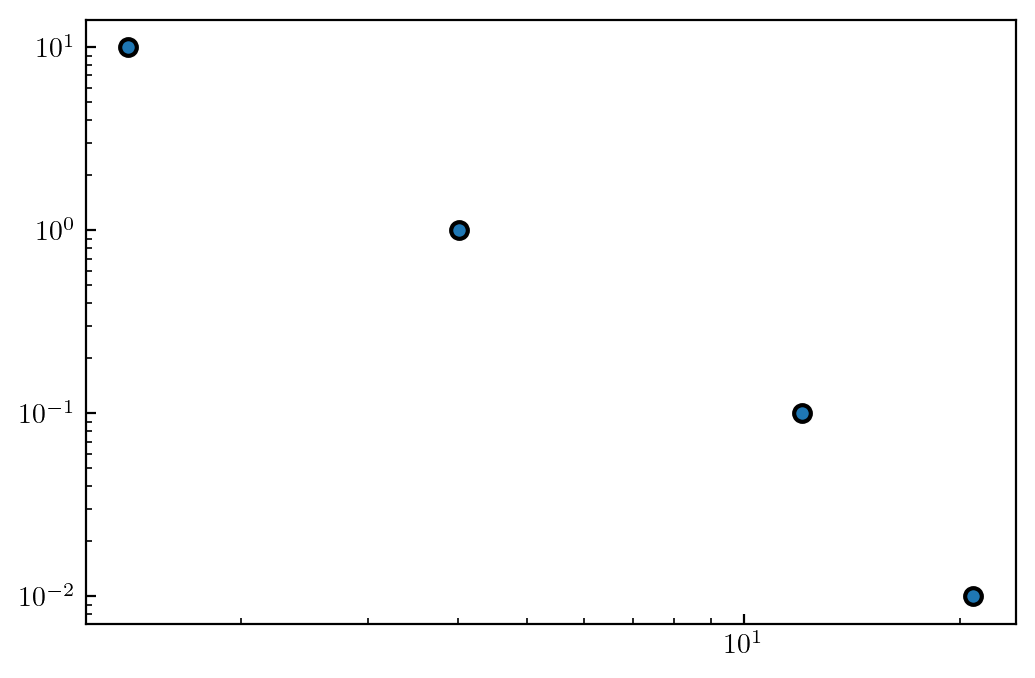

In [77]:
plt.loglog(bs, taus, "o")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.17it/s]


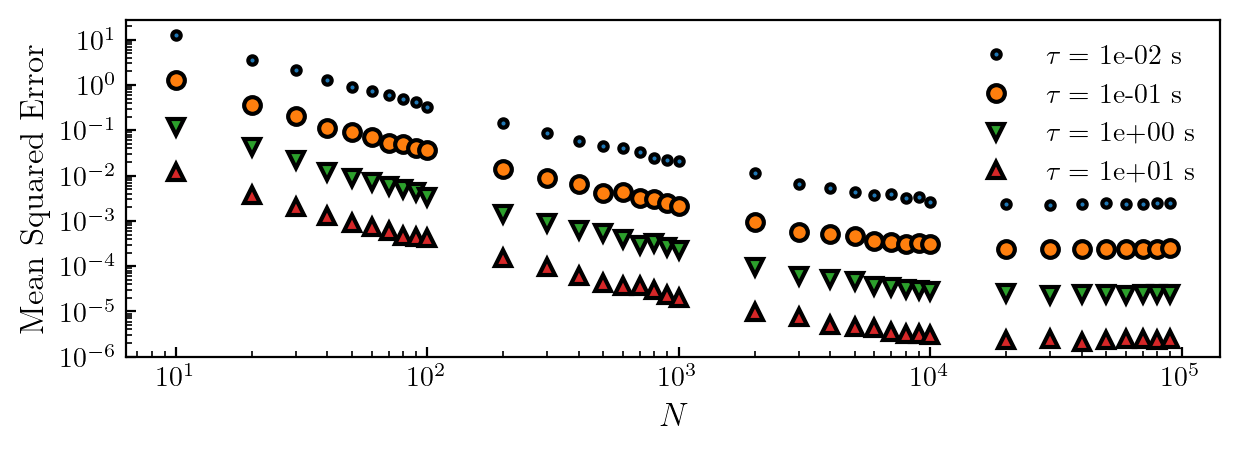

In [84]:
Ns = [*np.arange(10,100,10),*np.arange(100,1000,100), *np.arange(1000,10000,1000),*np.arange(10000,100000,10000)]
plt.figure(figsize=( cm2inch(16),cm2inch(6)))
taus = [0.01, 0.1, 1, 10]
sym = [".", "o", "v", "^", "s", "p"]
for j, tau in enumerate(taus):
    errs = np.zeros(len(Ns))
    for _ in trange(100):
        for n,i in enumerate(Ns):
            rdm = np.random.normal(0,np.sqrt(tau), i)
            X,Y = hist(rdm, 10) 
            errs[n] += np.mean((Y - gaussian(X, 0, np.sqrt(tau))) ** 2)
    errs = errs / 100
    plt.loglog(Ns, errs , sym[j] ,label = "$\\tau = $ {:.0e} s".format(tau))

ax = plt.gca()
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    

plt.ylabel("Mean Squared Error")
plt.xlabel("$N$")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("MSE-fixed bin.pdf")

In [62]:
tau = 0.001
rdm = np.random.normal(0,1/np.sqrt(tau), 1000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, 1/np.sqrt(tau))

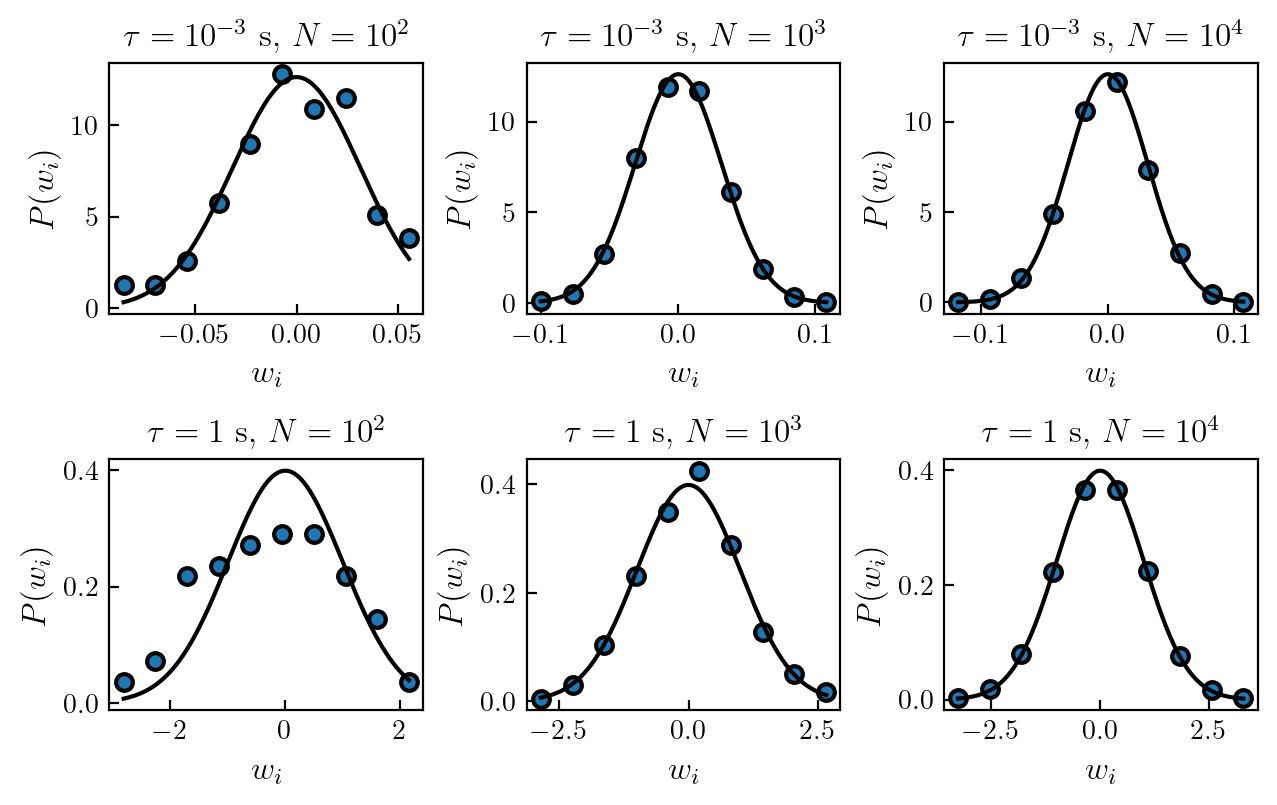

In [111]:
fig3 = plt.figure(figsize = (cm2inch(16),cm2inch(10)))
gs = fig3.add_gridspec(2, 3)

f3_ax1 = fig3.add_subplot(gs[0, 0])
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 100)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
#plt.text(0.5, 0.5, "$\tau = 0.001$ s, $N$ = 1000")
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 10^{-3}~ \mathrm{ s, } ~N = 10^2$  ")


f3_ax1 = fig3.add_subplot(gs[0, 1])
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 1000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 10^{-3} ~\mathrm{ s, }~ N = 10^3$  ")


f3_ax1 = fig3.add_subplot(gs[0, 2])
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 10000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 10000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 10^{-3} ~ \mathrm{ s, }~ N = 10^4$  ")


f3_ax1 = fig3.add_subplot(gs[1, 0])
tau = 1
rdm = np.random.normal(0,np.sqrt(tau), 100)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 1 ~ \mathrm{ s, }~ N = 10^2$  ")



f3_ax1 = fig3.add_subplot(gs[1, 1])
tau = 1
rdm = np.random.normal(0,np.sqrt(tau), 1000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 1000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 1 ~  \mathrm{ s, } ~N = 10^3$  ")

f3_ax1 = fig3.add_subplot(gs[1, 2])
tau = 1
rdm = np.random.normal(0,np.sqrt(tau), 10000)
X,Y = hist(rdm, 10) 
x = np.linspace(min(X), max(X), 10000)
gau = gaussian(x, 0, np.sqrt(tau))
plt.plot(X,Y, "o")
plt.plot(x,gau, "k")
plt.xlabel("$w_i$")
plt.ylabel("$P(w_i)$")
plt.title("$\\tau = 1 ~\mathrm{ s, }~ N = 10^4$  ")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.savefig("exemple.pdf")

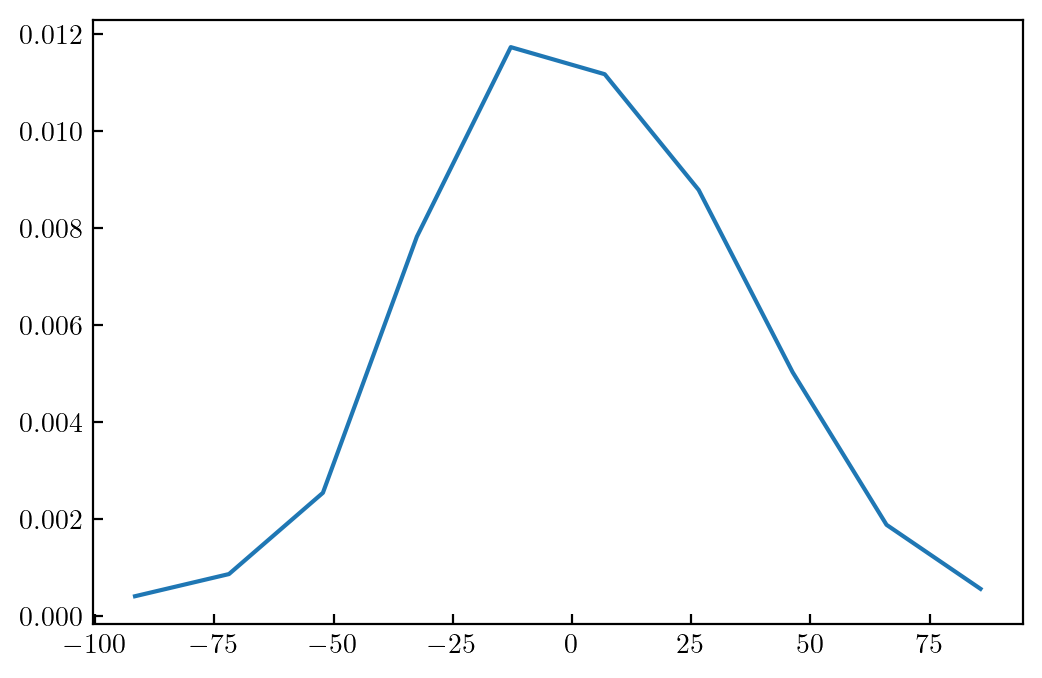

In [58]:
plt.plot(X,Y)

In [59]:
gau = gaussian(X, 0, 1/np.sqrt(tau))

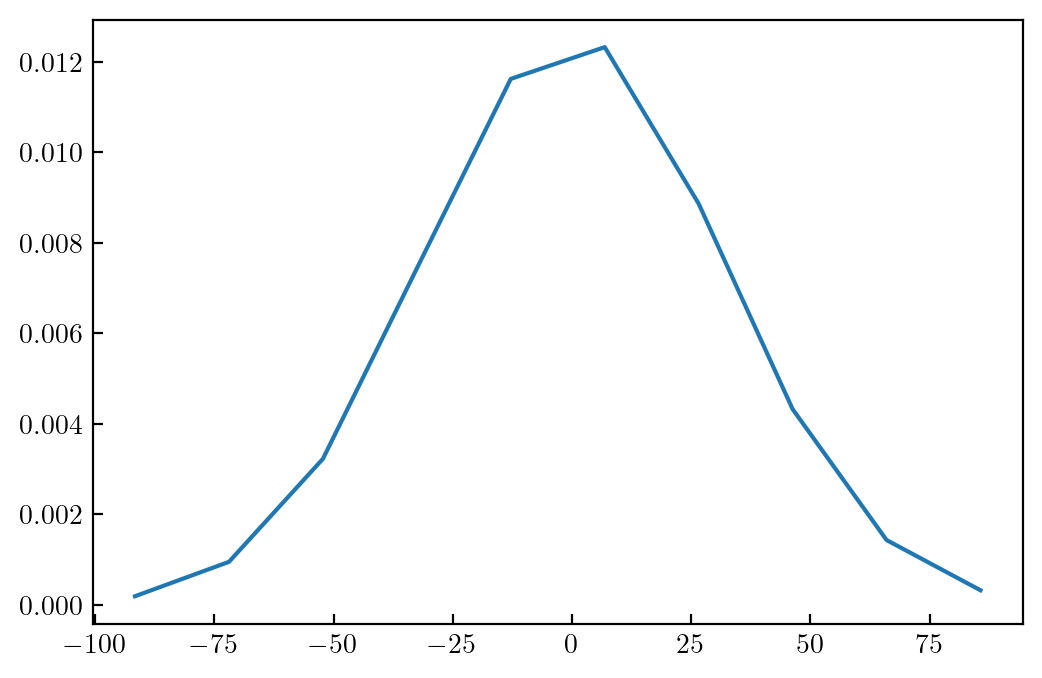

In [60]:
plt.plot(X,gau)

In [61]:
gau

array([0.00018944, 0.00094901, 0.00322472, 0.00743238, 0.01161929,
       0.01232103, 0.00886198, 0.00432344, 0.00143069, 0.00032113])

In [24]:
np.trapz(gau,x )

0.004192361112829939

In [1]:
wi

NameError: name 'wi' is not defined

In [10]:
rdm

array([-2.89582714e-03,  3.57611240e-03, -1.04192545e-02,  7.60764046e-03,
        1.51051432e-02,  1.32195574e-02, -2.44189334e-02,  1.46569531e-02,
       -5.26332322e-03,  2.65471096e-03, -2.63472279e-03, -1.29651668e-02,
       -1.71306278e-02,  1.07680583e-02,  9.11778117e-03, -1.09215010e-02,
        5.34150169e-03,  7.05482705e-03, -1.73714390e-02, -3.79628969e-04,
       -5.93196051e-03, -7.60520501e-03,  1.94279628e-03,  4.29213314e-03,
       -6.93549002e-03, -5.24346136e-03, -1.75681137e-03, -1.13290640e-02,
       -3.41450970e-03,  2.32069628e-03,  1.35501377e-02,  2.47045978e-02,
       -4.82694651e-03,  2.05927016e-02, -1.95396024e-02,  2.97745667e-03,
        1.84026852e-02, -1.47172815e-03,  7.33348203e-05, -1.00558956e-02,
        1.14827403e-02, -2.15374321e-03, -1.52967963e-02, -2.99935017e-03,
        4.56260600e-03,  1.83482121e-02,  1.81693507e-02,  1.67751041e-03,
       -1.99535136e-02,  9.09119724e-03,  8.47655340e-03,  7.42357604e-03,
       -6.84243842e-03, -

In [42]:
tau = 0.001
rdm = np.random.normal(0,np.sqrt(tau), 1000)
optimal_bins(rdm)

4.0

In [29]:
h(rdm)

3.999999999999999

In [30]:
diff(rdm) / h(rdm)

0.014456234192586752

In [31]:
len(rdm)

1000

In [35]:
np.log(len(rdm))

6.907755278982137